# further testing of the respiration information extraction
on activie measurement intervals

In [12]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import heartpy as hp
import pingouin as pg

from scipy.signal import butter, filtfilt, argrelextrema
from scipy import interpolate
from scipy.interpolate import interp1d

In [13]:
%load_ext autoreload
%autoreload 1
%aimport qex
%aimport al
%aimport eq
%aimport rp
%aimport rp2
%aimport mh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
%reload_ext autoreload

In [190]:
data_loc = './demodata/'
demofiles = os.listdir(data_loc)
plot_loc = './plots/'
mydpi = 196
df_files = pd.DataFrame(columns=['partID','NID','Event','Segment','Signal','fileloc'])
k = 0
for f in demofiles:
    if not f.startswith('Play'):
        dets = f.split('_')
        if len(dets)==4:
            df_files.loc[k,:] = {'partID':dets[2],'NID':int(dets[2][2:5]),'Event':dets[0],'Segment':dets[1],'Signal':dets[3][:-4],'fileloc':data_loc+f}
            k+=1

In [134]:
partID = 'VN106' 
subfiles = df_files.query('partID==@partID')
subfiles 

,partID,NID,Event,Segment,Signal,fileloc


In [209]:
partID = 'VN206'
piece='FULL'#'Ross'
concert = 'WTOrate1'#'C2'
sig_ex = '_'.join([concert,piece,partID])

# Score_map = pd.read_csv(data_loc+'PlayTimings - Score_parts.csv',index_col = 0)
# Pentries = pd.read_csv(data_loc+'PlayTimings_'+piece+'_entries.csv')
# Score_map = pd.read_csv(data_loc+'PlayTimingsLydo2024 - Score_parts.csv',index_col = 0)
# Pentries = pd.read_csv(data_loc+'PlayTimingsLydo2024_'+piece+'_entries.csv') 
part = Score_map.loc[partID,'Ross']

R = pd.read_csv(data_loc + sig_ex + '_EQRESP.csv', index_col = 0)
# R.set_index('p_sTime',drop=True,inplace=True)
Breaths = rp.Inspiration_Extract(R['Breathing'])  
# rp.Breath_Features(R['Breathing'],scalingfactor=1,filtered=False)
skewstat = newResp['Diff1'].std()*sf/expansion_dist.median()
Resp = rp2.unclip_minor(R['Breathing'].copy())
if skewstat>4:
    vel_c = 0.2
else:
    vel_c = 0.35
#         if skewstat>5:
# Resp=rp2.resp_compress(Resp)
Breaths2 = rp2.breath_cycles(rp2.Inspiration_Extract(Resp,True,vel_c,0.2),R['Breathing'])
Breaths3 = rp2.breath_cycles(rp2.EQ_Inspiration_Extract(Resp),R['Breathing'])
[len(Breaths),len(Breaths2),len(Breaths3),skewstat]

FileNotFoundError: [Errno 2] No such file or directory: './demodata/WTOrate1_FULL_BR604_EQRESP.csv'

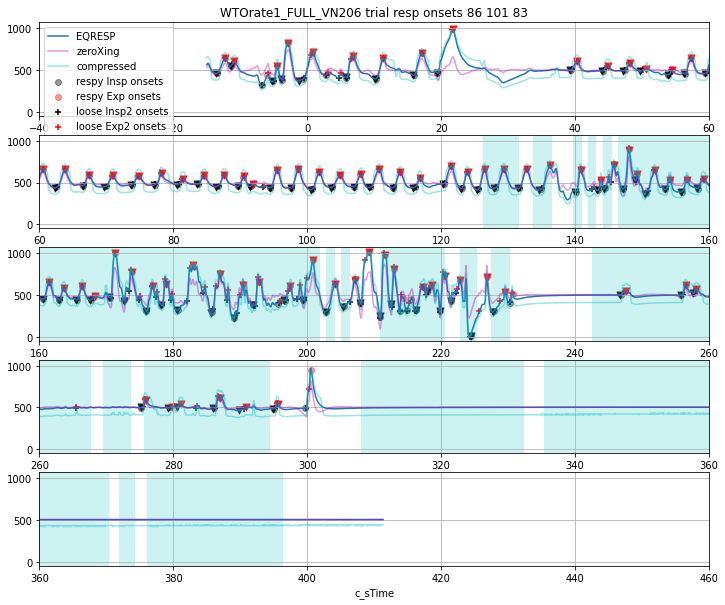

['VN206', 86, 101, 83, 2.599190762010255]


In [200]:
fig, axes = plt.subplots(5,1,figsize=(12,10))
K = rp2.resp_compress(R['Breathing'])

for i in range(len(axes)):
    ax = axes[i]
    R['Breathing'].plot(label = 'EQRESP',ax=ax)
    ax.plot(R.loc[:,['Breathing']] - rp2.respnormed(R['Breathing'],filtering_range = [0.2],scaling=1),'m',alpha = 0.4,label='zeroXing')
    K.plot(color='c',alpha = 0.4,label='compressed',ax=ax)
    #     ax.plot([-15,538],[512,512],c = 'k',linestyle = ':',label='crossings')
    
    ax.scatter(x=Breaths['In'],y = R.loc[Breaths['In'],'Breathing'],c = 'k',alpha = 0.4,label='respy Insp onsets')
    ax.scatter(x=Breaths['Ex'],y = R.loc[Breaths['Ex'],'Breathing'],c = 'r',alpha = 0.4,label='respy Exp onsets')
    ax.scatter(x=Breaths2['In'],y = R.loc[Breaths2['In'],'Breathing'],c = 'k',marker = '+',label='loose Insp2 onsets')
    ax.scatter(x=Breaths2['Ex'],y = R.loc[Breaths2['Ex'],'Breathing'],c = 'r',marker = '+',label='loose Exp2 onsets')
    ax.scatter(x=Breaths3['In'],y = R.loc[Breaths3['In'],'Breathing'],c = 'k',marker = 'v',s = 50,alpha = 0.8,label='filt Insp3 onsets')
    ax.scatter(x=Breaths3['Ex'],y = R.loc[Breaths3['Ex'],'Breathing'],c = 'r',marker = 'v',s = 50,alpha = 0.8,label='filt Exp3 onsets')
#     ax.set_xlim([-85+i*150,-85+(i+1)*150])
    ax.set_xlim([-40+i*100,-40+(i+1)*100])
    ax.grid()
    if i <1: ax.legend()
    eq.play_shade(ax,Pentries,concert,part)
axes[0].set_title(' '.join([sig_ex,'trial resp onsets',str(len(Breaths)),str(len(Breaths2)),str(len(Breaths3))])) #,'InspVelMin',str(vel_c),'ExpMin',str(expMin),'MinInsT',str(minInspT),' True Exp']))
plt.savefig('_'.join(['./plots/trial',sig_ex,'InEx.jpg']),bbox_inches = 'tight',dpi = 200)
plt.show()
print([partID,len(Breaths),len(Breaths2),len(Breaths3),skewstat])

In [195]:
# concert = 'C2'
segID = 'Ross'
Score_map = pd.read_csv(data_loc+'PlayTimingsLydo2024 - Score_parts.csv',index_col = 0)
Pentries = pd.read_csv(data_loc+'PlayTimingsLydo2024_'+segID+'_entries.csv') 
Pentries['WTOrate1'] = Pentries['C2']
Pentries['WTOrate2'] = Pentries['C4']
concert = 'WTOrate1'
segID = 'FULL'
# concert = 'C2'

sigID = 'EQRESP'
sf = 25.6
subfiles = df_files.query('Event == @concert and Segment==@segID and Signal==@sigID').sort_values('NID').reset_index(drop = True)
secID = subfiles['partID']

In [196]:
subfiles

,partID,NID,Event,Segment,Signal,fileloc
0,VN101,101,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN101_EQRESP.csv
1,VN104,104,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN104_EQRESP.csv
2,VN109,109,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN109_EQRESP.csv
3,VN110,110,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN110_EQRESP.csv
4,VN201,201,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN201_EQRESP.csv
5,VN206,206,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN206_EQRESP.csv
6,VN211,211,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VN211_EQRESP.csv
7,VA304,304,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VA304_EQRESP.csv
8,VA309,309,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_VA309_EQRESP.csv
9,LS405,405,WTOrate1,FULL,EQRESP,./demodata/WTOrate1_FULL_LS405_EQRESP.csv


In [37]:
concert = 'C3'
segID = 'Reic'
sigID = 'EQRESP'
subfiles = df_files.query('Event == @concert and Segment==@segID and Signal==@sigID').sort_values('NID').reset_index(drop = True)

In [171]:
Pentries

,S_1,mm,Score_mm,Conductor,Piccolo,Flute,Oboe_1,Oboe_2,EnglishHorn,Clarinet,...,C1,RD,C2,C3,C4,C5,C6,C7,WTOrate1,WTOrate2
0,1.109333,1.00,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009333,-0.000667,-0.020667,-0.000667,0.019333,0.019333,-0.010667,0.109333,-0.020667,0.019333
1,8.713333,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.373333,7.340000,7.483333,7.930000,8.050000,7.560000,7.070000,7.713333,7.483333,8.050000
2,13.720000,4.50,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.750000,12.210000,12.570000,12.950000,13.240000,13.240000,12.530000,12.720000,12.570000,13.240000
3,17.880000,5.50,5.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.970000,16.550000,16.210000,17.490000,17.830000,16.980000,16.330000,16.880000,16.210000,17.830000
4,19.340000,6.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.050000,18.090000,17.760000,19.670000,19.620000,19.200000,17.800000,18.340000,17.760000,19.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,384.138000,265.00,469.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,394.088000,387.248000,386.848000,400.468000,393.218000,386.988000,383.998000,383.138000,386.848000,393.218000
192,384.336000,265.25,469.25,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,394.306000,387.456000,387.056000,400.650000,393.456000,387.196000,384.186000,383.336000,387.056000,393.456000
193,385.848000,267.25,471.25,NaN,1.0,1.0,1.0,1.0,NaN,NaN,...,395.810000,388.970000,388.600000,402.180000,394.970000,388.650000,385.750000,384.840000,388.600000,394.970000
194,387.990000,270.00,474.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,397.950000,391.120000,390.780000,404.410000,397.150000,390.750000,387.890000,386.990000,390.780000,397.150000


[72.824 20.281  7.939 14.534  8.305  3.591]
['VN101', 129, 135, 126]
[157.431  66.536  22.718  34.244  19.568   2.366]
Clipped!
['VN104', 155, 156, 152]
[123.553  28.343   9.864  25.286  14.449   4.359]
['VN109', 112, 121, 114]
[122.645  33.235  14.896  24.53   14.017   3.69 ]
['VN110', 118, 122, 116]
[175.82   76.817  16.875  43.176  24.672   2.289]
['VN201', 133, 138, 134]
[163.326  12.172   0.797  28.908  16.519  13.419]
['VN206', 86, 93, 83]
[85.932 34.612  8.644 21.133 12.076  2.483]
['VN211', 136, 138, 131]
[51.76  20.582  6.148 12.208  6.976  2.515]
['VA304', 145, 150, 134]
[72.678 19.742  5.256 15.931  9.103  3.681]
['VA309', 118, 122, 115]
[125.028  33.827   6.121  29.824  17.042   3.696]
Clipped!
['LS405', 105, 109, 103]
[50.414 21.431  4.935 12.564  7.18   2.352]
['LS407', 148, 155, 140]
[111.536  21.97    8.272  18.037  10.307   5.077]
['WW506', 117, 143, 121]
[177.95   92.728  24.781  46.34   26.48    1.919]
['WW508', 134, 138, 133]
[159.588  54.211   7.948  39.687  22.678

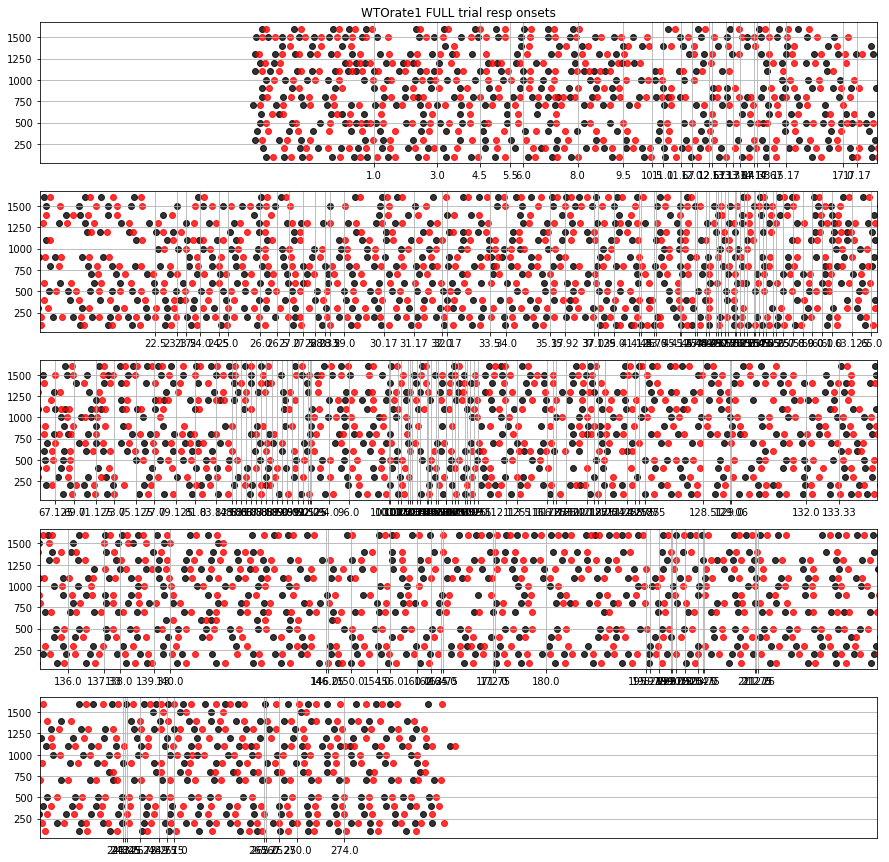

In [197]:
# concert = 'C2'
# segID = 'Arba'
# Score_map = pd.read_csv(data_loc+'PlayTimings - Score_parts.csv',index_col = 0)
# Pentries = pd.read_csv(data_loc+'PlayTimings_'+segID+'_entries.csv')
# sigID = 'EQRESP'
# sf = 25.6
# subfiles = df_files.query('Event == @concert and Segment==@segID and Signal==@sigID').sort_values('NID').reset_index(drop = True)
# secID = subfiles['partID']

fig, axes = plt.subplots(5,1,figsize=(15,15))

for j in range(len(secID)):
    partID = secID[j]
    sig_ex = '_'.join([concert,segID,partID])
    part = Score_map.loc[partID,'Ross']
    
    filename  = data_loc + sig_ex + '_EQRESP.csv'
    if os.path.isfile(filename):
        R = pd.read_csv(data_loc + sig_ex + '_EQRESP.csv')#, index_col = 0)
        R.set_index('c_sTime',drop=True,inplace=True)
        Breaths = rp.Inspiration_Extract(R['Breathing']) # old selections
        newResp = R.loc[:,['Breathing']].copy()
        newResp['Filt'] = rp2.respnormed(R['Breathing'],scaling=1)
        newResp['Diff1'] = rp2.diffed(newResp['Filt'] )
        expansion_dist = newResp['Diff1'].loc[newResp['Diff1']>0].copy()*sf
        print(np.round([newResp['Diff1'].std()*sf,expansion_dist.median(),expansion_dist.quantile(0.25),expansion_dist.mean()*0.35,expansion_dist.mean()*0.2,newResp['Diff1'].std()*sf/expansion_dist.median()],3))
        skewstat = newResp['Diff1'].std()*sf/expansion_dist.median()
        Resp = rp2.unclip_minor(R['Breathing'].copy())
        if skewstat>4:
            vel_c = 0.2
        else:
            vel_c = 0.35
#         if skewstat>5:
#             Resp=resp_compress(Resp)

        Breaths2 = rp2.breath_cycles(rp2.Inspiration_Extract(Resp,False,vel_c,0.2),R['Breathing']) 

        # additional filtering
        Breaths3=Breaths2.copy()
        # cut "breaths" that expire from well below the baseline 
        thresh = R['Breathing'].quantile(0.25)
        Breaths3 =  rp2.breath_cycles(Breaths3.loc[Breaths3['Ex_C']>thresh,['In','Ex']].reset_index(drop = True),R['Breathing'])
        # cutting short expirations
        thresh = 0.4
        B=pd.DataFrame()
        J = Breaths3['Exp_T']>thresh
        J.iloc[-1] = True
        K = Breaths3['Exp_T'].shift(1)>thresh
        K.iloc[0] = True
        B.loc[:,'In']= Breaths3.loc[K,'In'].values
        B.loc[:,'Ex']= Breaths3.loc[J,'Ex'].values
        Breaths3 = rp2.breath_cycles(B,R['Breathing'])
        # cutting short inspirations
        thresh = 0.4 #0.25 # s
        Breaths3 =  rp2.breath_cycles(Breaths3.loc[Breaths3['Insp_T']>thresh,['In','Ex']].reset_index(drop = True),R['Breathing'])
        # cutting expirations that end with higher values than they started
        thresh = 0
        Breaths3 =  rp2.breath_cycles(Breaths3.loc[Breaths3['IE_DR']>thresh,['In','Ex']].reset_index(drop = True),R['Breathing'])
        print([partID,len(Breaths),len(Breaths2),len(Breaths3)])

        for i in range(len(axes)):
            ax = axes[i]
            ax.scatter(x=Breaths3['In'],y = (j+1)*100*np.ones(len(Breaths3)),c = 'k',alpha = 0.8,label='Insp3 onsets')
            ax.scatter(x=Breaths3['Ex'],y = (j+1)*100*np.ones(len(Breaths3)),c = 'r',alpha = 0.8,label='Exp3 onsets')

for i in range(len(axes)):
#     eq.play_shade(axes[i],Pentries,concert,part)
    axes[i].set_xticks(Pentries[concert])
    axes[i].set_xticklabels(Pentries['mm'])
#     axes[i].set_xlim([-20+i*80,-20+(i+1)*80])
#     axes[i].set_xlim([-15+i*110,-15+(i+1)*110])    
    axes[i].set_xlim([-40+i*100,-40+(i+1)*100])

    axes[i].grid()
axes[0].set_title(' '.join([concert,segID,'trial resp onsets'])) 
plt.savefig('_'.join(['./plots/Group',concert,segID,'InEx.jpg']),bbox_inches = 'tight',dpi = 200)

plt.show()

In [208]:
cols = []
for c in R.columns: 
    if not c.endswith('.1'): cols.append(c)
cols

['rec_sTime', 'Breathing', 'rec_dTime', 'dev_dTime']

In [61]:
Pentries

,S_1,mm,Part_0,Part_1,Part_2,C1,RD,C2,C3,C4,C5,Time_s
0,1.080,0,1.0,1.0,1.0,0.080,0.190023,0.013333,-0.022000,0.056000,0.046667,-0.022000
1,8.871,1,0.0,0.0,NaN,7.871,8.803175,8.168000,8.336000,8.168000,8.120000,8.336000
2,16.740,2,NaN,NaN,NaN,15.740,17.300227,16.328000,16.696000,16.328000,16.246667,16.696000
3,24.820,3,NaN,NaN,NaN,23.820,25.949660,24.616000,24.965333,24.653333,24.453333,24.965333
4,32.890,4,NaN,NaN,NaN,31.890,34.596190,32.904000,33.598667,32.904000,32.653333,33.598667
5,41.037,5,NaN,NaN,NaN,40.037,43.255782,41.200000,42.110667,41.186667,40.946667,42.110667
6,49.130,6,NaN,NaN,NaN,48.130,51.928435,49.488000,50.604000,49.538667,49.180000,50.604000
7,57.290,7,NaN,NaN,NaN,56.290,60.696871,57.904000,59.190667,57.997333,57.500000,59.190667
8,65.440,8,NaN,NaN,NaN,64.440,69.417415,66.208000,67.721333,66.317333,65.740000,67.721333
9,73.630,9,NaN,NaN,NaN,72.630,78.133605,74.576000,76.354667,74.765333,74.000000,76.354667


In [52]:
Breath = rp2.Inspiration_Extract(Resp,False,vel_c,0.2)
rp2.breath_cycles(Breath,R['Breathing'])

,In,Ex,In_C,Ex_C,IDepth,EDepth,Insp_T,Period_T,Exp_T,IE_Ratio,IE_DR,Insp_V,Exp_V,RelID,RelED
0,-11.324,-10.348,505,560,55,69.0,0.976,2.812,1.836,0.531590,0.797101,56.352459,37.581699,NaN,NaN
1,-8.512,-7.848,491,511,20,11.0,0.664,2.189,1.525,0.435410,1.818182,30.120482,7.213115,NaN,NaN
2,-6.323,-5.503,500,544,44,55.0,0.820,2.421,1.601,0.512180,0.800000,53.658537,34.353529,1.157895,1.718750
3,-3.902,-3.198,489,527,38,30.0,0.704,3.086,2.382,0.295550,1.266667,53.977273,12.594458,1.000000,0.937500
4,-0.816,0.122,497,529,32,32.0,0.938,3.087,2.149,0.436482,1.000000,34.115139,14.890647,0.820513,0.780488
5,2.271,3.717,497,571,74,81.0,1.446,3.477,2.031,0.711965,0.913580,51.175657,39.881832,1.897436,1.975610
6,5.748,6.568,490,529,39,41.0,0.820,2.148,1.328,0.617470,0.951220,47.560976,30.873494,1.000000,1.000000
7,7.896,9.225,488,545,57,47.0,1.329,3.400,2.071,0.641719,1.212766,42.889391,22.694351,1.461538,1.146341
8,11.296,11.843,498,522,24,21.0,0.547,2.148,1.601,0.341661,1.142857,43.875686,13.116802,0.615385,0.512195
9,13.444,14.069,501,520,19,25.0,0.625,2.461,1.836,0.340414,0.760000,30.400000,13.616558,0.703704,1.000000


In [41]:
os.path.isfile(filename)

False